# About: Rebuilding World's continents with Manifold Learning

The purpose of this notebook to get an approximation of continents using clustering algorithms. We use *Manifold Learning* algorithms such as *Kernel PCA, Spectral Embeddings, Stochastic Neighbor Embeddings* and its recent sibling, *t-SNE*. The data contains the Cartesian coordinates of different points representing the World's continents. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import SpectralEmbedding, MDS, TSNE, Isomap
from sklearn.decomposition import PCA, KernelPCA

# Getting a first visualization of what we want

In [2]:
X = pd.read_csv('data_world.csv')

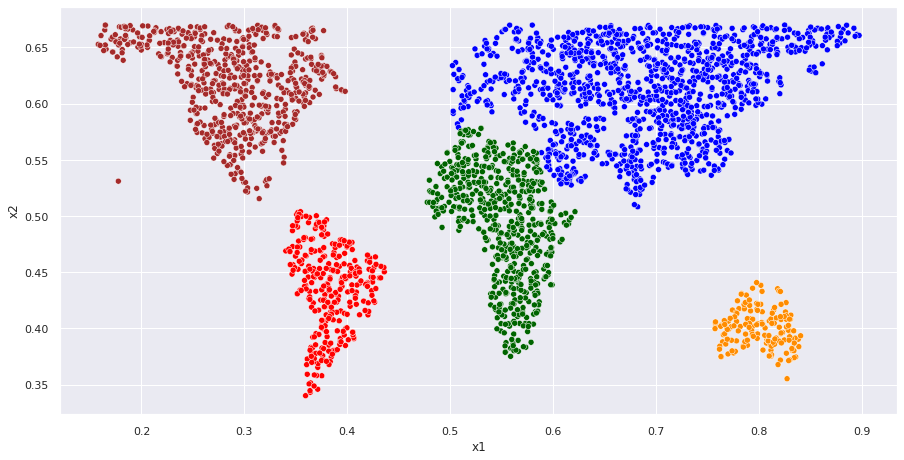

In [3]:
plt.figure(figsize=(15,7.5))
sns.set(style="darkgrid")
p = sns.scatterplot(data = X,x = X.x1 , y = X.x2,  c = X.color,legend=False)

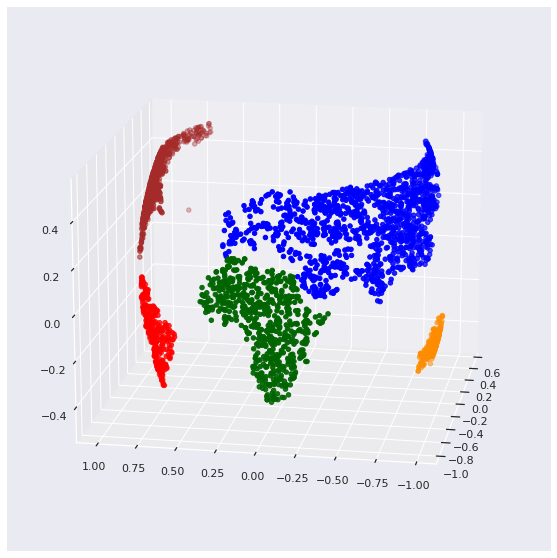

In [4]:
p = X.x1 * (2 * np.pi - 0.55)
t = X.x2 * np.pi
x_sphere = np.sin(t) * np.cos(p)
y_sphere = np.sin(t) * np.sin(p)
z_sphere = np.cos(t)
X_sphere = np.array([ x_sphere , y_sphere , z_sphere ]).T
X_sphere .shape
from mpl_toolkits import mplot3d
plt. figure ( figsize =(15 ,10))
ax = plt.axes( projection = '3d')
ax.view_init (16, - 170)
ax.scatter3D( X_sphere [:, 0], X_sphere[:, 1], - X_sphere [:, 2], c = X.color)
plt.show ()

# Getting hands dirty

## Multidimensional Scaling

(-1.370897001686179, 1.193579874386371, -1.311394958201304, 0.8535838952312087)

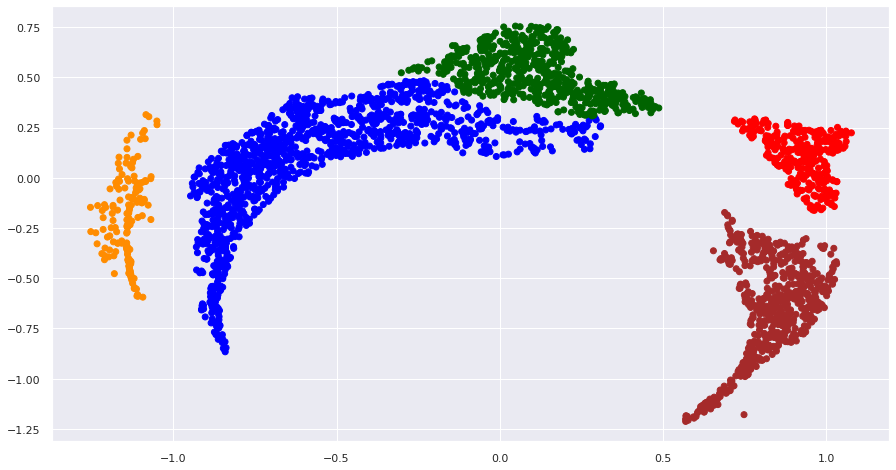

In [5]:
mds = MDS(2, max_iter=100, n_init=1)
trans_data = mds.fit_transform(X_sphere).T

fig = plt.figure(figsize=(15, 8))
#ax = fig.add_subplot(258)
plt.scatter(trans_data[0], trans_data[1], c=X.color)#, cmap=plt.cm.rainbow)

plt.axis('tight')

## Spectral Embedding 

/home/ed4st/anaconda3/envs/DS/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


(-0.015488119132421822,
 0.016434438960125138,
 -0.012062173544225594,
 0.12729565662040335)

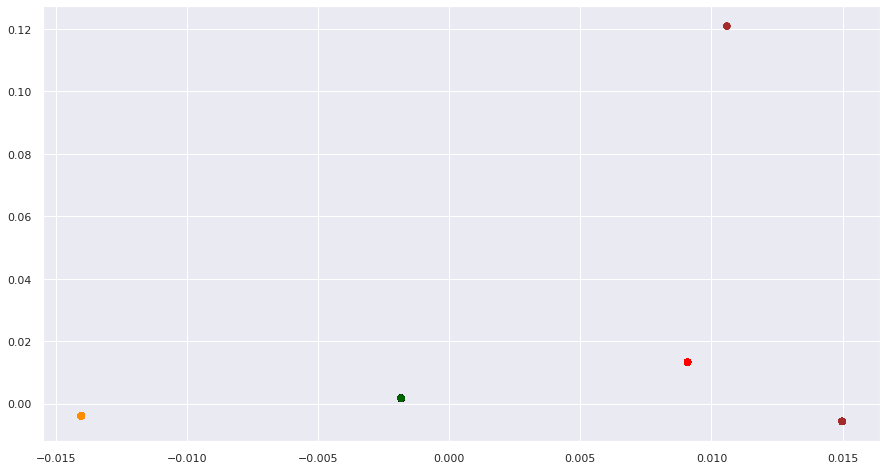

In [8]:
se = SpectralEmbedding(n_components=2,eigen_solver='arpack',
                                n_neighbors=6)
trans_data = se.fit_transform(X_sphere).T

fig = plt.figure(figsize=(15, 8))
plt.scatter(trans_data[0], trans_data[1], c=X.color, cmap=plt.cm.rainbow)
plt.axis('tight')

/home/ed4st/anaconda3/envs/DS/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


(-0.11822864907627535,
 0.13337357268015956,
 -0.07138670504518402,
 0.09426880426691803)

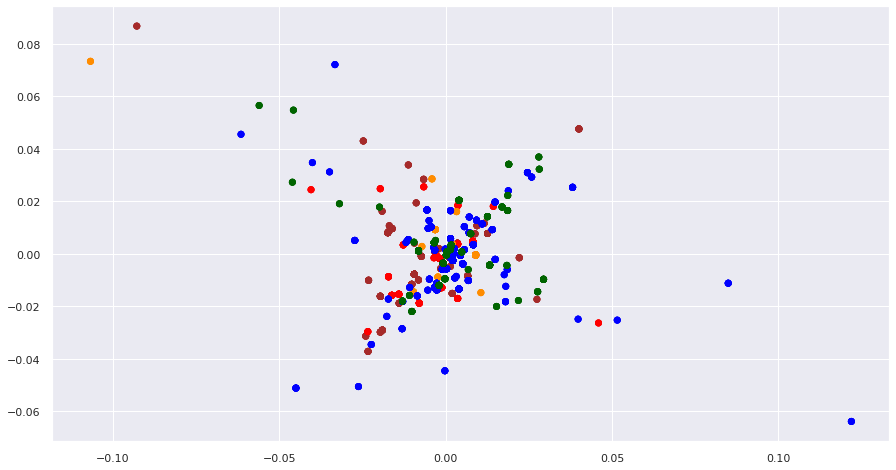

In [10]:
se = SpectralEmbedding(n_components=2,eigen_solver='arpack',
                                n_neighbors=3)
trans_data = se.fit_transform(X_sphere).T

fig = plt.figure(figsize=(15, 8))
plt.scatter(trans_data[0], trans_data[1], c=X.color, cmap=plt.cm.rainbow)
plt.axis('tight')

## t-distributed Stochastic Neighbor Embedding

(-60.7570686340332, 56.29014205932617, -37.503509521484375, 40.99687194824219)

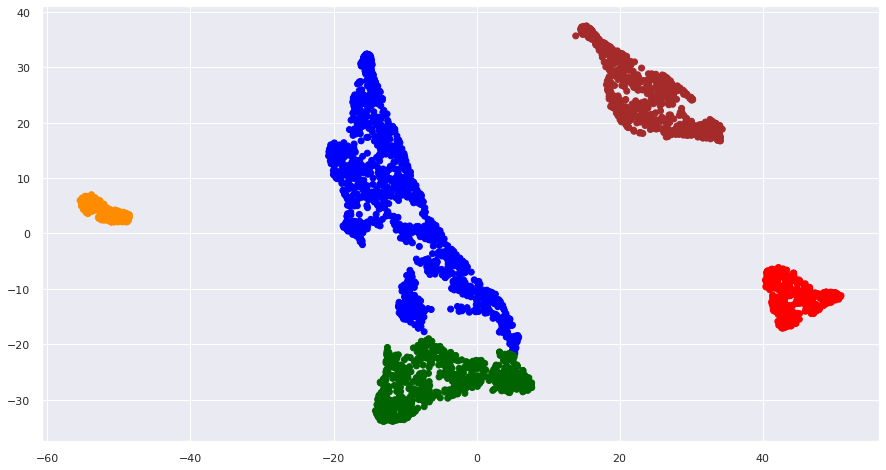

In [7]:
tsne = TSNE(n_components=2, init='pca', random_state=0, perplexity=100)
trans_data = tsne.fit_transform(X_sphere).T

fig = plt.figure(figsize=(15, 8))
plt.scatter(trans_data[0], trans_data[1], c=X.color)

plt.axis('tight')

## Isomap

/home/ed4st/anaconda3/envs/DS/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_neighbors=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


(-1.1870110621056373,
 1.6326122117107105,
 -0.49169963086276613,
 0.8601353911685925)

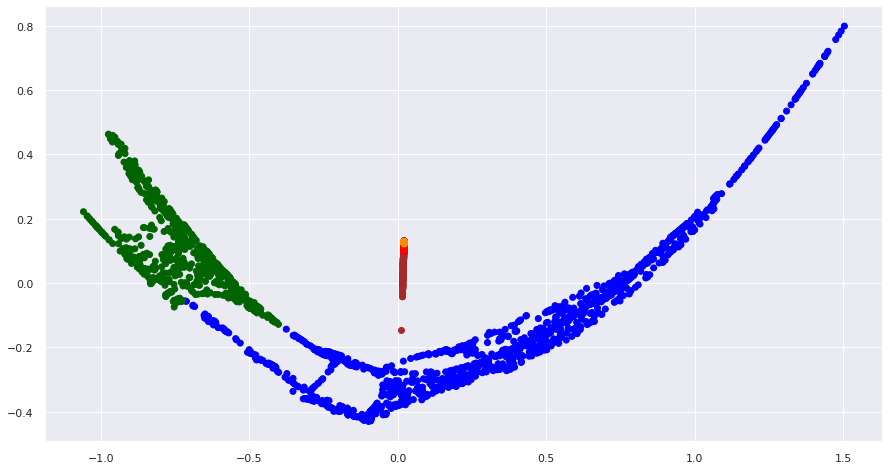

In [105]:
trans_data = Isomap(5, n_components=2)\
    .fit_transform(X_sphere).T

fig = plt.figure(figsize=(15, 8))
plt.scatter(trans_data[0], trans_data[1], c=X.color)
plt.axis('tight')

## PCA

(-0.9687899016806476,
 1.1829421884415114,
 -0.643395004410395,
 1.103319580861758)

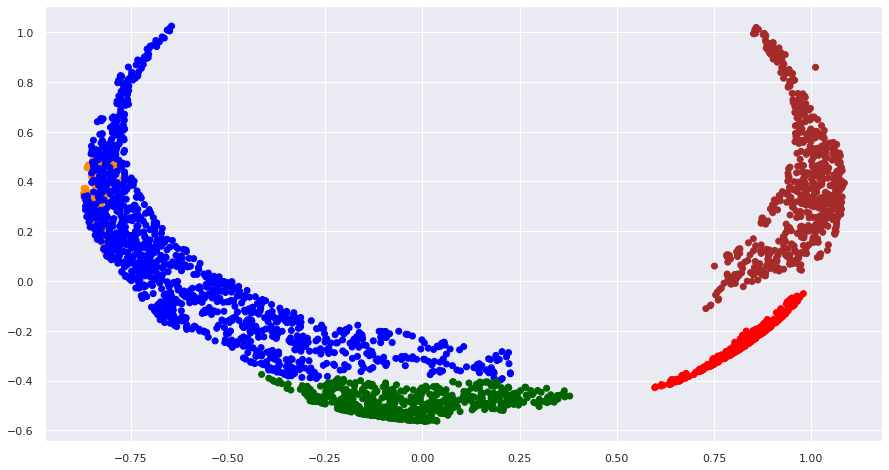

In [88]:
trans_data = PCA(n_components=2)\
    .fit_transform(X_sphere).T

fig = plt.figure(figsize=(15, 8))
plt.scatter(trans_data[0], trans_data[1], c=X.color)
plt.axis('tight')

## Kernel PCA

(-0.6085687657366784,
 0.7938848513763394,
 -0.5388078211412294,
 0.6412958976131596)

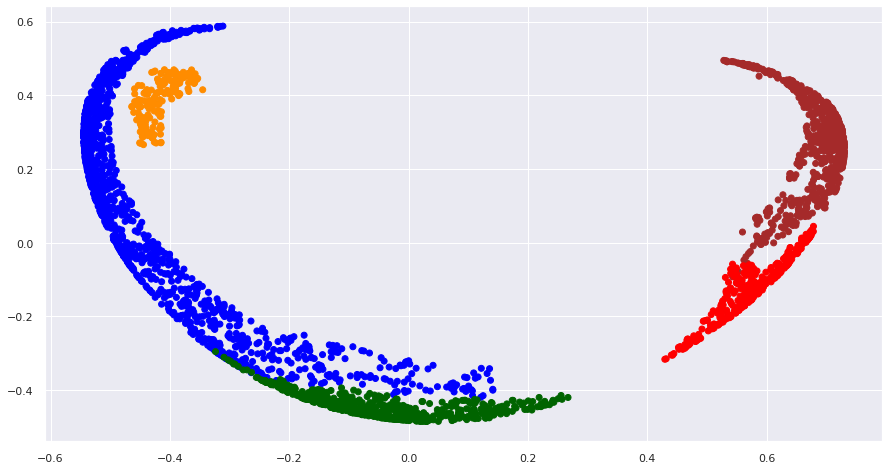

In [27]:
trans_data = KernelPCA(n_components=2, kernel='rbf', gamma=0.5)\
    .fit_transform(X_sphere).T

fig = plt.figure(figsize=(15, 8))
plt.scatter(trans_data[0], trans_data[1], c=X.color)
plt.axis('tight')